In [ ]:
"""Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

This one is better I think - it has the actual docs: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py 

This is also slightly more concise/clear than the top above: https://bennett-holiday.medium.com/a-step-by-step-guide-to-writing-an-lda-program-in-python-690aa99119ea 
"""

'Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 '

In [86]:
import pandas as pd

articles = pd.read_csv('../process_articles/processed_articles.csv')

In [87]:
# articles = articles.sample(10)
print(len(articles))
articles.head(1)

2179


,authors,title,date,year,edition,url,text,quarter,year_quarter,cleaned_text,cleaned_text_wspaces,unigram,bigram,unigram_count,bigram_count
0,NaN,本期导读,2024-01-01,2024,1.0,http://www.qstheory.cn/dukan/qs/2024-01/01/c_1...,本期发表了习近平总书记的重要文章《以美丽中国建设全面推进人与自然和谐共生的现代化》。文章强调...,1,2024 Q1,本期发表了习近平总书记的重要文章以美丽中国建设全面推进人与自然和谐共生的现代化文章强调今后5...,本期 发表 了 习近平 总书记 的 重要 文章 以 美丽 中国 建设 全面 推进 人与自然 ...,"['本期', '发表', '了', '习近平', '总书记', '的', '重要', '文章...","['本期发表', '发表了', '了习近平', '习近平总书记', '总书记的', '的重要...","{'的': 24, '文章': 14, '建设': 11, '中国': 10, '美丽': ...","{'美丽中国': 9, '的文章': 9, '中国建设': 7, '习近平总书记': 4, ..."


In [88]:
# drop rows that don't have text
articles = articles.dropna(subset=["cleaned_text_wspaces"])
print(len(articles))

2056


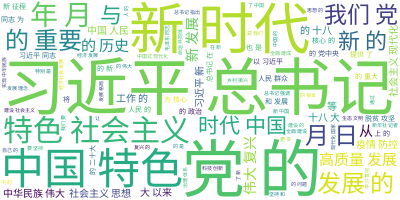

In [89]:
# make a word cloud... https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html - one link, didn't seem to work
from wordcloud import WordCloud

long_string = ' '.join(list(articles["cleaned_text_wspaces"]))

font_path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'

# Create a WordCloud object
wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [90]:
# for index, row in articles.iterrows():
#     print(len(row['cleaned_text_wspaces']))

In [91]:
import stopwordsiso
from stopwordsiso import stopwords

stopwords_zh = stopwords(["zh"])

In [92]:
def remove_stopwords(row_text):
    return [word for word in row_text.split(" ") if word not in stopwords_zh]

articles['cleaned_text_wspaces'] = articles['cleaned_text_wspaces'].apply(lambda row_text: remove_stopwords(row_text))

In [93]:
# for index, row in articles.iterrows():
#     print(len(row['cleaned_text_wspaces']))

In [94]:
# articles['cleaned_text_wspaces']

In [95]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [96]:
docs = list(articles['cleaned_text_wspaces'])

In [97]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)


In [98]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2024-02-25 00:12:36,660 : INFO : collecting all words and their counts
2024-02-25 00:12:36,660 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-02-25 00:12:38,226 : INFO : collected 1306705 token types (unigram + bigrams) from a corpus of 3382894 words and 2056 sentences
2024-02-25 00:12:38,227 : INFO : merged Phrases<1306705 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2024-02-25 00:12:38,227 : INFO : Phrases lifecycle event {'msg': 'built Phrases<1306705 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 1.57s', 'datetime': '2024-02-25T00:12:38.227815', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}


In [99]:
docs[0]

['本期',
 '发表',
 '习近平',
 '总书记',
 '重要',
 '文章',
 '美丽',
 '中国',
 '建设',
 '全面',
 '推进',
 '人与自然',
 '和谐',
 '共生',
 '现代化',
 '文章',
 '强调',
 '今后',
 '5',
 '美丽',
 '中国',
 '建设',
 '重要',
 '时期',
 '深入',
 '贯彻',
 '新',
 '时代',
 '中国',
 '特色',
 '社会主义',
 '生态',
 '文明',
 '思想',
 '坚持',
 '人民',
 '中心',
 '牢固',
 '树立',
 '践行',
 '绿水青山',
 '金山',
 '银山',
 '理念',
 '建设',
 '美丽',
 '中国',
 '摆在',
 '强国',
 '建设',
 '民族',
 '复兴',
 '突出位置',
 '推动',
 '城乡',
 '人居',
 '环境',
 '明显改善',
 '美丽',
 '中国',
 '建设',
 '取得',
 '显著',
 '成效',
 '高品质',
 '生态环境',
 '支撑',
 '高质量',
 '发展',
 '第一',
 '持续',
 '深入',
 '污染',
 '防治',
 '攻坚战',
 '第二',
 '加快',
 '推动',
 '发展',
 '方式',
 '绿色',
 '低碳',
 '转型',
 '第三',
 '着力',
 '提升',
 '生态系统',
 '多样性',
 '稳定性',
 '持续性',
 '第四',
 '积极',
 '稳妥',
 '推进',
 '碳达峰',
 '碳',
 '第五',
 '守牢',
 '美丽',
 '中国',
 '建设',
 '安全',
 '底线',
 '第六',
 '健全',
 '美丽',
 '中国',
 '建设',
 '保障体系',
 '本刊',
 '配发',
 '学习',
 '习近平',
 '总书记',
 '重要',
 '文章',
 '编辑部',
 '文章',
 '全面',
 '推进',
 '美丽',
 '中国',
 '建设',
 '系统',
 '部署',
 '围绕',
 '学习',
 '宣传',
 '贯彻',
 '党',
 '二十大',
 '精神',
 '习近平',
 '总书记',
 '重要',
 '文章',
 '精神',
 '本期',
 '刊发',

In [100]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2024-02-25 00:12:57,853 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-02-25 00:12:59,011 : INFO : built Dictionary<107024 unique tokens: ['1', '11', '130', '2023', '2023_1']...> from 2056 documents (total 3903087 corpus positions)
2024-02-25 00:12:59,011 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<107024 unique tokens: ['1', '11', '130', '2023', '2023_1']...> from 2056 documents (total 3903087 corpus positions)", 'datetime': '2024-02-25T00:12:59.011838', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}
2024-02-25 00:12:59,041 : INFO : discarding 91087 tokens: [('中国', 1838), ('中国_特色', 1339), ('中国作家协会', 11), ('中心', 1119), ('主要', 1037), ('习近平', 1948), ('习近平_总书记', 1789), ('人民', 1692), ('任务', 1273), ('作出', 1305)]...
2024-02-25 00:12:59,041 : INFO : keeping 15937 tokens which were in no less than 20 and no more than 1028 (=50.0%) docu

In [101]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [102]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 15937
Number of documents: 2056


In [103]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2100
passes = 20
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-02-25 00:13:20,848 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-02-25 00:13:20,850 : INFO : using serial LDA version on this node
2024-02-25 00:13:20,858 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 2056 documents, updating model once every 2056 documents, evaluating perplexity every 2056 documents, iterating 400x with a convergence threshold of 0.001000
2024-02-25 00:13:41,908 : INFO : -10.270 per-word bound, 1234.7 perplexity estimate based on a held-out corpus of 2056 documents with 2590200 words
2024-02-25 00:13:41,909 : INFO : PROGRESS: pass 0, at document #2056/2056
2024-02-25 00:14:00,366 : INFO : optimized alpha [0.06823674, 0.06618972, 0.07983604, 0.087488614, 0.091279596, 0.06957888, 0.10304947, 0.0894679, 0.10530038, 0.09664355]
2024-02-25 00:14:00,379 : INFO : topic #1 (0.066): 0.007*"生态" + 0.005*"安全" + 0.004*"保护" + 0.004*"法治" + 0.003*"治理" + 0.003*"疫情" + 0.00

In [ ]:
from pprint import pprint

pprint(model.print_topics())

In [ ]:
coherence_model_lda = CoherenceModel(model=model, texts=docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)